In [5]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output
#print(check_output(["ls", "../input"]).decode("utf8"))

In [6]:
import pandas as pd # to import csv and for data manipulation
import matplotlib.pyplot as plt # to plot graph
import seaborn as sns # for intractve graphs
import numpy as np # for linear algebra
%matplotlib inline
from sklearn.preprocessing import StandardScaler # for preprocessing the data
from sklearn.ensemble import RandomForestClassifier # Random forest classifier
from sklearn.svm import SVC # for SVM classification
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split # to split the data
from sklearn.model_selection import GridSearchCV # for tunnig hyper parameter it will use all combination of given parameters
from sklearn import metrics
from sklearn.model_selection import cross_val_score

# Read Data

read data from csv file

In [7]:
data = pd.read_csv("./creditcard.csv",header = 0)

In [8]:
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


# Check data distribution

In [9]:
Count_Normal_transacation = len(data[data["Class"]==0]) # normal transaction are repersented by 0
Count_Fraud_transacation = len(data[data["Class"]==1]) # fraud by 1
print(Count_Fraud_transacation)
Percentage_of_Normal_transacation = Count_Normal_transacation/(Count_Normal_transacation+Count_Fraud_transacation)
print("percentage of normal transacation is",Percentage_of_Normal_transacation*100)
Percentage_of_Fraud_transacation= Count_Fraud_transacation/(Count_Normal_transacation+Count_Fraud_transacation)
print("percentage of fraud transacation",Percentage_of_Fraud_transacation*100)

492
percentage of normal transacation is 99.82725143693798
percentage of fraud transacation 0.1727485630620034


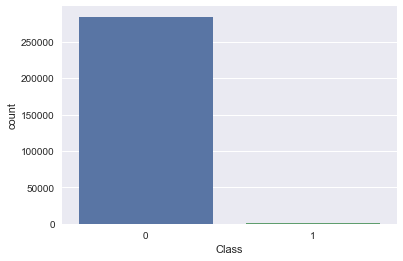

In [10]:
sns.countplot("Class",data=data)

In [11]:
fraud_indices= np.array(data[data.Class==1].index)
normal_indices = np.array(data[data.Class==0].index)

In [12]:
def undersample(normal_indices,fraud_indices,times):#times denote the normal data = times*fraud data
    Normal_indices_undersample = np.array(np.random.choice(normal_indices,(times*Count_Fraud_transacation),replace=False))
    undersample_data= np.concatenate([fraud_indices,Normal_indices_undersample])
    undersample_data = data.iloc[undersample_data,:]
    
    print("the normal transacation proportion is :",len(undersample_data[undersample_data.Class==0])/len(undersample_data[undersample_data.Class]))
    print("the fraud transacation proportion is :",len(undersample_data[undersample_data.Class==1])/len(undersample_data[undersample_data.Class]))
    print("total number of record in resampled data is:",len(undersample_data[undersample_data.Class]))
    return(undersample_data)

In [58]:
undersample_data = undersample(normal_indices, fraud_indices, 4)

the normal transacation proportion is : 0.8
the fraud transacation proportion is : 0.2
total number of record in resampled data is: 2460


# Data slicing

In [59]:
x = undersample_data.iloc[:, :-1]

In [60]:
y = undersample_data.iloc[:,-1]

# Standardize data

In [61]:
scaler = StandardScaler()
scaler.fit(x)
x = scaler.transform(x)

# Split data

In [62]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

# Train model

Define model test

In [63]:
def test_model(model, x_train, y_train, x_test, y_test, search_parameters):
    
    grid_model = GridSearchCV(model, search_parameters,cv=10,scoring='accuracy')
    
    # train model
    grid_model.fit(x_train, y_train)
    print('model best score: ',grid_model.best_score_)
    print('model best hiperparameters: ', grid_model.best_params_)
    
    #test model
    y_pred= grid_model.predict(x_test)
    print('test accuracy: ',metrics.accuracy_score(y_pred,y_test))

# Define svm model with a grid search of all 3 kernels

In [64]:
svm_model= SVC()

search_parameters = {
 'C': (np.arange(0.1,1,0.1)) , 'kernel': ['linear'],
 'C': (np.arange(0.1,1,0.1)) , 'gamma': [0.01,0.02,0.03,0.04,0.05], 'kernel': ['rbf'],
 'degree': [2,3,4] ,'gamma':[0.01,0.02,0.03,0.04,0.05], 'C':(np.arange(0.1,1,0.1)) , 'kernel':['poly']
}

test_model(svm_model, x_train, y_train, x_test, y_test, search_parameters)

model best score:  0.952743902439
model best hiperparameters:  {'kernel': 'poly', 'degree': 3, 'C': 0.90000000000000002, 'gamma': 0.05}
test accuracy:  0.959349593496


# Define random forest model

In [72]:
rf_model = RandomForestClassifier()

search_parameters = {
    'n_estimators': np.arange(1, 500, 100)
}

test_model(rf_model, x_train, y_train, x_test, y_test, search_parameters)

model best score:  0.97256097561
model best hiperparameters:  {'n_estimators': 101}
test accuracy:  0.971544715447


# Define logistic regression classifier

In [71]:
lg_model = LogisticRegression()

search_parameters = {
    'C': np.arange(0.1, 1, 0.01)
}

test_model(lg_model, x_train, y_train, x_test, y_test, search_parameters)

model best score:  0.969512195122
model best hiperparameters:  {'C': 0.95999999999999952}
test accuracy:  0.971544715447


# Compare models

In [67]:
def score_model(model, x_train, y_train):
    scores = cross_val_score(estimator=model,
                        X=x_train,
                        y=y_train,
                        cv=10,
                        n_jobs=1)
    plt.title('Cross validation scores')
    plt.scatter(np.arange(len(scores)), scores)
    plt.axhline(y=np.mean(scores), color='g') # Mean value of cross validation scores
    plt.show()
    print('model score: ',np.mean(scores))

SVM Model

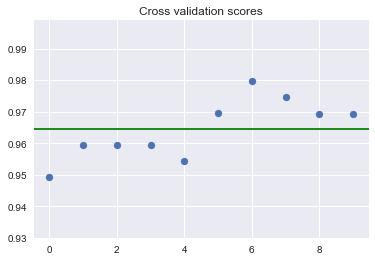

model score:  0.964435926655


In [68]:
score_model(svm_model, x_train, y_train)

Random Forest Model

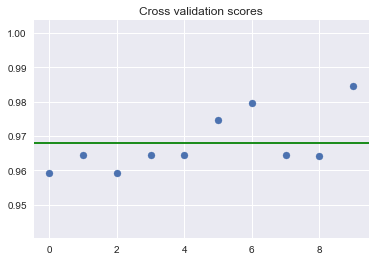

model score:  0.967994405884


In [69]:
score_model(rf_model, x_train, y_train)

Logistic Model


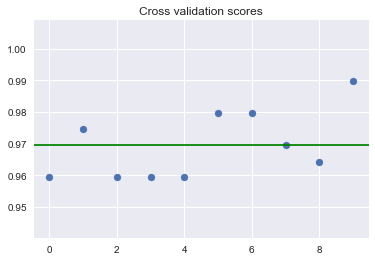

model score:  0.969519838392


In [70]:
score_model(lg_model, x_train, y_train)